# Geopandas Training

**Inhalt:**
- Geodaten laden
- Koordinaten transformieren
- Einfache Datenanalyse mit Denkmalgeschützten Objekten
- Food deserts mit Schweizer Daten replizieren

**Nötige Skills**
- Geodatenhandling 1 und 2

## Setup

Importieren Sie die nötigen Libraries: pandas, geopandas, shapely-geometrien

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon

## Import

**Schweizer Gemeinden**

Ein shapefile mit den Schweizer Gemeinden ist unter folgendem Pfad abgelegt:
`'dataprojects/Projections/shp/g1g17.shp'`

Lesen Sie es ein, zeigen Sie die ersten Zeilen an und machen Sie einen einfachen Plot. (Achtung: shapefile einlesen mit der Option `encoding='utf-8'`).

In [2]:
gdf_gem = gpd.read_file('dataprojects/Projections/shp/g1g17.shp', encoding='utf-8')

In [3]:
gdf_gem.head(2)

,GMDNR,GMDNAME,BZNR,KTNR,GRNR,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,...,Z_AVG,Z_MED,Z_CNTR,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry
0,1,Aeugst am Albis,101,1,4,791,678110,681154,234561,238544,...,684,673,699,2678110,2681154,1234561,1238544,2679300,1235700,"POLYGON ((680805.251 237763.620, 681154.070 23..."
1,10,Obfelden,101,1,4,754,672793,676118,232987,237091,...,439,439,452,2672793,2676118,1232987,1237091,2675100,1235300,"POLYGON ((676118.253 235522.704, 675847.098 23..."


<AxesSubplot:>

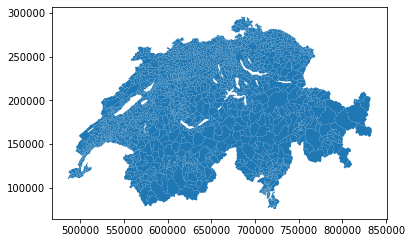

In [4]:
gdf_gem.plot()

**Denkmalschutz**

Ein Shapefile aller Denkmalgeschützten Objekte im Kanton Zürich ist unter folgendem Pfad abgelegt:
`dataprojects/Denkmalschutz/Denkmalschutzobjekte/ARV_KAZ_DENKMALSCHUTZOBJEKTE_P.shp`

Lesen Sie es ein, zeigen Sie die ersten Zeilen an und machen Sie einen einfachen Plot

In [5]:
gdf_ds = gpd.read_file('dataprojects/Denkmalschutz/Denkmalschutzobjekte/ARV_KAZ_DENKMALSCHUTZOBJEKTE_P.shp')

In [6]:
gdf_ds.head(2)

,GEMEINDE,ORT,PLZ,STRASSE,ENSEMBLE,OBJEKT,GVZ_NR,BAUJAHR,EINSTUFUNG,FESTSETZUN,ERLASS,SCHUTZ,GRUNDBUCHE,OST,NORD,geometry
0,Niederweningen,Niederweningen,8166,Steig 4,"Niederweningen: Bauernhaus, ehem.",Hausteil 2,09100140,1760,-,None,None,PD,19790809,2.670068e+06,1.261839e+06,POINT (2670067.991 1261838.998)
1,Niederweningen,Niederweningen,8166,Dorfstrasse 61,None,"Speicher, ehem. mit Trotte",09100133,1885,-,None,None,PD,19890313,2.670151e+06,1.261830e+06,POINT (2670150.991 1261829.997)


<AxesSubplot:>

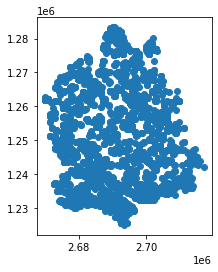

In [7]:
gdf_ds.plot()

Wie viele denkmalgeschützte Objekte gibt es im Kanton Zürich?

In [8]:
len(gdf_ds)

6566

In welchem Koordinatensystem sind die Geodaten codiert?

In [9]:
gdf_ds.crs

{'init': 'epsg:2056'}

Transformieren Sie die Daten ins Schweizer Koordinatensystem

In [10]:
gdf_ds = gdf_ds.to_crs(epsg=21781)

## Ein einfacher Plot

Der Kanton Zürich ist unter folgender Kantonsnummer (`KTNR`) codiert: `1`.

Filtern Sie die Zürcher Gemeinden aus dem Geodataframe und speichern Sie diese in einem neuen GDF

In [11]:
gdf_zh = gdf_gem[gdf_gem['KTNR'] == 1]

Plotten Sie das Zürcher Gemeinde-GDF zusammen mit den denkmalgeschützten Objekten

<AxesSubplot:>

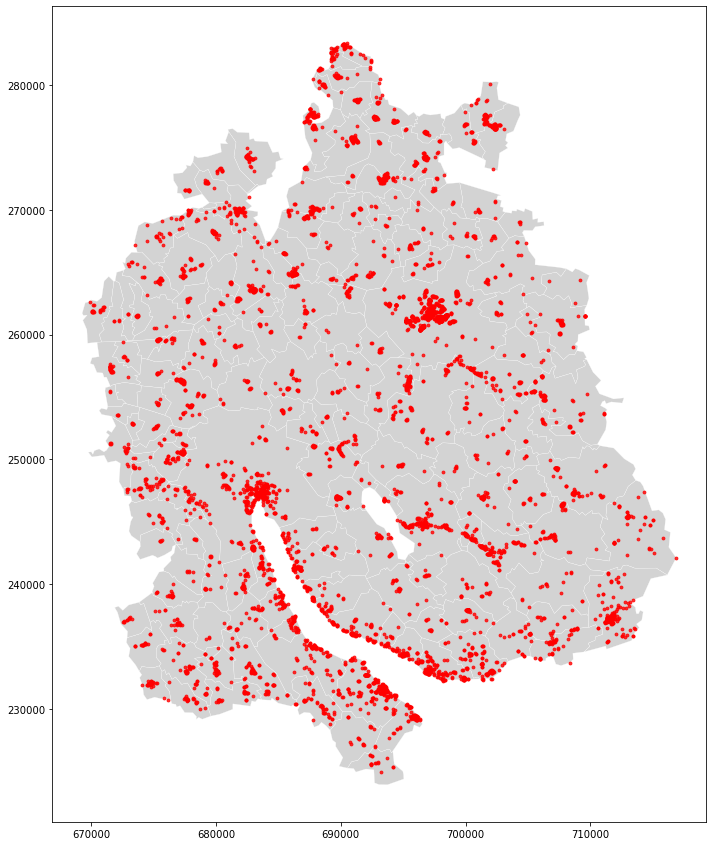

In [12]:
ax = gdf_zh.plot(figsize=(15,15), color='lightgrey', linewidth=0.25, edgecolor='white')
gdf_ds.plot(ax=ax, color='red', markersize=8, alpha = 0.8)

## Analyse: Denkmalschutz

Uns interessiert: In welcher Gemeinde gibt es wieviele denkmalgeschützte Objekte?

### Daten kombinieren 1

Fügen Sie jeder Zeile im Denkmalschutz-GDF die passende Geoinformation aus dem Gemeinden-GDF hinzu.

**Tipp:** Sie brauchen dazu einen Spatial Join.

Speichern Sie die kombinierten Infos in einem neuen GDF.

(Die Fehlermeldung `CRS of frames does not match` können Sie hier ignorieren).

In [13]:
gdf_ds_gem = gpd.sjoin(gdf_ds, gdf_zh, how='left', op='within')

/Users/simon/opt/anaconda3/envs/CAS-Datenjournalismus/lib/python3.8/site-packages/geopandas/tools/sjoin.py:58: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:21781', 'no_defs': True} != {'init': 'epsg:21781'})
  warn(


Checken Sie annhand der ersten zwei Objekte, ob es funktioniert hat

In [14]:
gdf_ds_gem.head(2)

,GEMEINDE,ORT,PLZ,STRASSE,ENSEMBLE,OBJEKT,GVZ_NR,BAUJAHR,EINSTUFUNG,FESTSETZUN,...,Z_MAX,Z_AVG,Z_MED,Z_CNTR,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR
0,Niederweningen,Niederweningen,8166,Steig 4,"Niederweningen: Bauernhaus, ehem.",Hausteil 2,09100140,1760,-,None,...,859.0,555.0,538.0,457.0,2669244.0,2671807.0,1259309.0,1264668.0,2670700.0,1262000.0
1,Niederweningen,Niederweningen,8166,Dorfstrasse 61,None,"Speicher, ehem. mit Trotte",09100133,1885,-,None,...,859.0,555.0,538.0,457.0,2669244.0,2671807.0,1259309.0,1264668.0,2670700.0,1262000.0


Gibt es Objekte, denen keine Gemeinde zugewiesen wurde? Wenn ja, warum nicht?

In [15]:
gdf_ds_gem[gdf_ds_gem['GMDNAME'].isnull()]

,GEMEINDE,ORT,PLZ,STRASSE,ENSEMBLE,OBJEKT,GVZ_NR,BAUJAHR,EINSTUFUNG,FESTSETZUN,...,Z_MAX,Z_AVG,Z_MED,Z_CNTR,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR
92,Glattfelden,None,8192,Rheinsfelden,Glattfelden: Kraftwerk Rheinsfelden,Fischtreppe,None,1,kantonal,19791219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
279,Küsnacht (ZH),Küsnacht,8700,Seestrasse 29a,Küsnacht (ZH): Goldbacherhof,Waschhaus/Atelier,15400749,1895,regional,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
291,Küsnacht (ZH),Küsnacht,8700,Hornweg 28a,Küsnacht (ZH): Landhaus Seehof,Badehaus,15400339,1850,kantonal,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,Erlenbach (ZH),Erlenbach,8703,Seestrasse 92,Erlenbach (ZH): Landhaus Gerenhof,Wohnhaus Gerenhof,15100498,1917,regional,19921228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,Horgen,Horgen,8810,Hirsackerstrasse 25,Horgen: Fabrikantensitz Stünzi,Bootshaus,13301250,1903,regional,19791219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6195,Männedorf,Männedorf,8708,Dorfgasse 37,Männedorf: Untervogtshaus,Untervogthaus/Verwaltungsgebäude,15500503,1543,kantonal,19791219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6418,Hombrechtikon,Feldbach,8714,Schirmensee 4,None,"Bauernhaus, ehem.",15300251,1596,regional,19791219,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6441,Hombrechtikon,Feldbach,8714,Horn 4,None,Bootshaus,15300162,1895,regional,19921228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6482,Wiesendangen,Kefikon,8543; 8544,Schlossweg 5,Wiesendangen: Schloss Bertschikon/Kefikon,Nebengebäude,29803120,1742,regional,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#Es handelt sich um Objekte im Seegebiet, die nicht innerhalb der Gemeindegrenzen liegen

Erstellen Sie anhand des neuen GDF eine Liste, die für jede Gemeinde die Anzahl der Denkmalschutz-Objekte enthält.

Speichern Sie die Liste wiederum als neues Dataframe.

In [17]:
df_anzahl = gdf_ds_gem['GMDNAME'].value_counts().to_frame().rename(columns={'GMDNAME': 'Anzahl'})

Welches sind die fünf Gemeinden, die am meisten Objekte haben?

In [18]:
df_anzahl.head(5)

,Anzahl
Winterthur,777
Zürich,357
Wädenswil,226
Wald (ZH),161
Uster,147


### Daten kombinieren 2

Fügen Sie nun dem urspünglichen Zürcher Gemeinde-GDF die Infos zur Anzahl Denkmalschutzobjekte aus dem soeben erstellten DF hinzu

In [19]:
gdf_zh_anz = gdf_zh.merge(df_anzahl, how='left', left_on='GMDNAME', right_index=True)

Checken Sie das Ergebnis anhand der Zürcher Gemeinde Obfelden. Wie viele Objekte gibt es dort?

In [20]:
gdf_zh_anz[gdf_zh_anz['GMDNAME'] == 'Obfelden']

,GMDNR,GMDNAME,BZNR,KTNR,GRNR,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,...,Z_MED,Z_CNTR,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry,Anzahl
497,261,Zürich,112,1,4,8793,676224,689665,241584,254306,...,453,409,2676224,2689665,1241584,1254306,2683100,1247100,"POLYGON ((684249.637 253917.051, 684430.504 25...",357.0


Gibt es Gemeinden, zu denen keine Information hinzugefügt wurde?

In [21]:
gdf_zh_anz[gdf_zh_anz['Anzahl'].isnull()]

,GMDNR,GMDNAME,BZNR,KTNR,GRNR,AREA_HA,X_MIN,X_MAX,Y_MIN,Y_MAX,...,Z_MED,Z_CNTR,E_MIN,E_MAX,N_MIN,N_MAX,E_CNTR,N_CNTR,geometry,Anzahl
2151,85,Dänikon,104,1,4,287,671734,674000,254209,256174,...,446,441,2671734,2674000,1254209,1256174,2672900,1255400,"POLYGON ((673786.137 256006.995, 673987.140 25...",NaN


Wenn ja, ersetzen Sie in der entsprechenden Spalte die NaN-Werte durch Nullen.

In [22]:
gdf_zh_anz['Anzahl'] = gdf_zh_anz['Anzahl'].fillna(0)

### Plot

Wir möchten eine Choropleth-Map der Zürcher Gemeinden zeichnen.
Die Farbcodierung der Gemeinden richtet sich nach der Anzahl Objekte.

/Users/simon/opt/anaconda3/envs/CAS-Datenjournalismus/lib/python3.8/site-packages/pysal/explore/segregation/network/network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
/Users/simon/opt/anaconda3/envs/CAS-Datenjournalismus/lib/python3.8/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


Text(0.5, 1.0, 'Anzahl denkmalgeschützte Objekte pro Gemeinde')

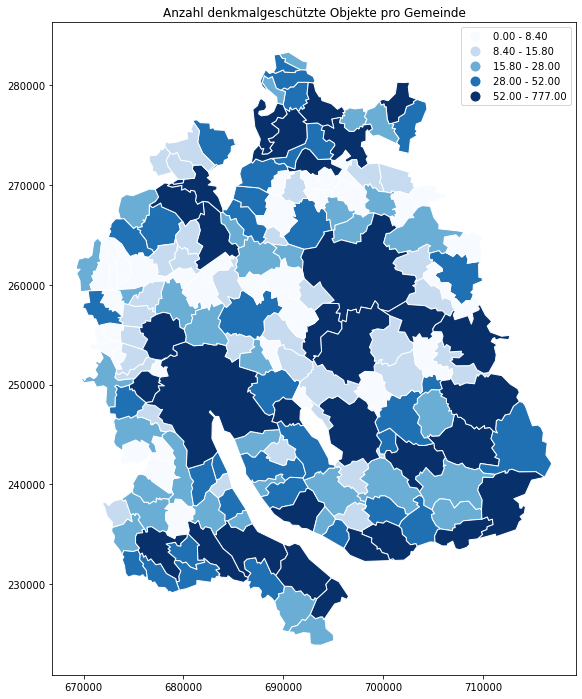

In [23]:
ax = gdf_zh_anz.plot(column='Anzahl', cmap='Blues', scheme='quantiles', edgecolor='white', legend=True, figsize=(12,12))
ax.set_title('Anzahl denkmalgeschützte Objekte pro Gemeinde')

## Analyse 2: Geschäfte

Hier interessiert uns die Lage der Coop-Geschäfte im Kanton Zürich.

### Import

Eine Liste der Coop-Filialen ist abgelegt unter: `'dataprojects/Coop/geschaefte.csv'`

In [24]:
df_stores = pd.read_csv('dataprojects/Coop/geschaefte.csv')

In [25]:
df_stores.head(2)

,latitude,longitude,name,ort,plz,strasse,hausnummer,typ
0,46.837574,8.186167,coop-supermarkt-giswil,Giswil,6074,Brünigstrasse,42,retail
1,46.728708,8.181781,coop-supermarkt-meiringen,Meiringen,3860,Alpwegern,2,retail


Welche Spalten beinhalten die relevante Information? Um was für Koordinatentypen handelt es sich?

### Geometrie definieren

Erstellen Sie aus dem DF der Geschäfte ein GDF, indem Sie
- eine Geometrie-Spalte mit Punkten erstellen
- ein GDF kreieren, mithilfe dieser Spalte
- das Koordinatensystem dieses GDF initiieren
- die Koordinaten ins Schweizer System umrechnen

In [26]:
df_stores['Punkt'] = df_stores.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

In [27]:
gdf_stores = gpd.GeoDataFrame(df_stores, geometry='Punkt')

In [28]:
gdf_stores.crs = {'init': 'epsg:4326'}

In [29]:
gdf_stores = gdf_stores.to_crs(epsg=21781)

### Auswählen

Uns interessieren nur die Geschäfte im Kanton zürich. Filtern Sie diese heraus und speichern sie in einem neuen GDF.

In [30]:
gdf_stores_zh = gdf_stores[gdf_stores.within(gdf_zh.unary_union)]

Zum checken, ob es funktioniert hat: einfacher plot

<AxesSubplot:>

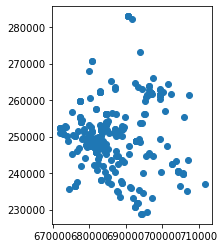

In [31]:
gdf_stores_zh.plot()

### Plot

Plotten Sie die Coop-Läden im Kanton Zürich auf dem Hintergrund der Gemeindekarte

<AxesSubplot:>

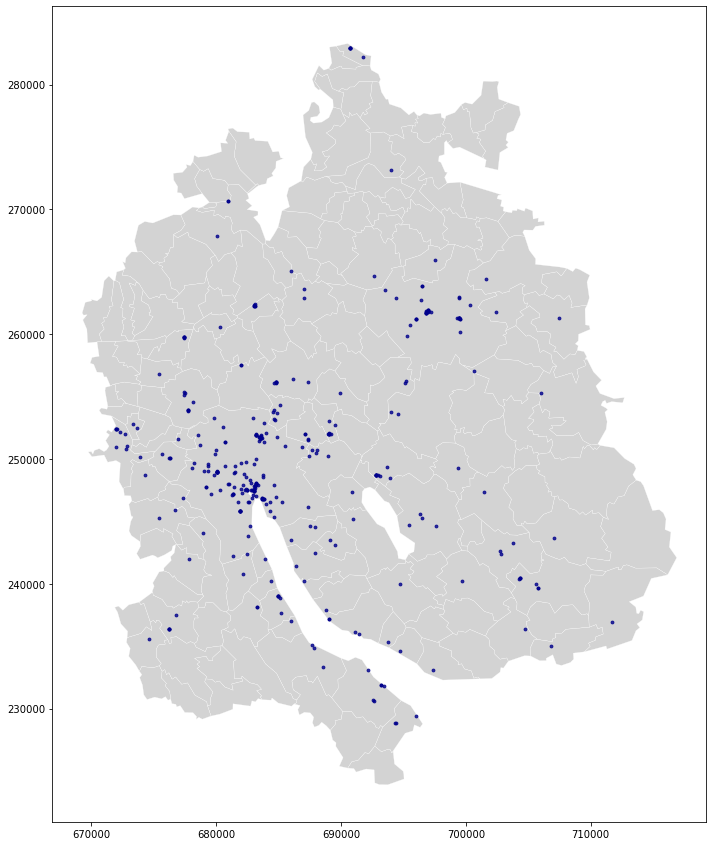

In [32]:
ax = gdf_zh.plot(figsize=(15,15), color='lightgrey', linewidth=0.25, edgecolor='white')
gdf_stores_zh.plot(ax=ax, color='darkblue', markersize=8, alpha = 0.8)

### Filter 1

In welchen Gemeinden gibt es keinen Coop?

Zur Vorbereitung: alle Coop-Filialen zu einem einzigen Shape zusammenfügen

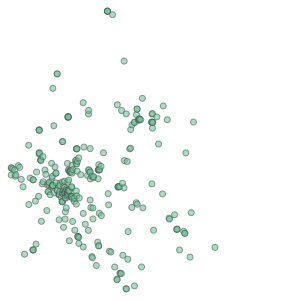

In [33]:
gdf_stores_zh.unary_union

Filtern Sie nun die Zürcher Gemeinden: Welche davon haben keinen Berührungspunkt mit dem Coop-Filialen-Shape? Speichern Sie die gefilterte Liste in einem neuen GDF.

In [34]:
gdf_zh_nostores = gdf_zh[gdf_zh.disjoint(gdf_stores_zh.unary_union)]

Plot:
- Alle Zürcher Gemeinden
- Alle Coop-Filialen im Kt ZH
- in besonderer Farbe: die Gemeinden ohne Coop

<AxesSubplot:>

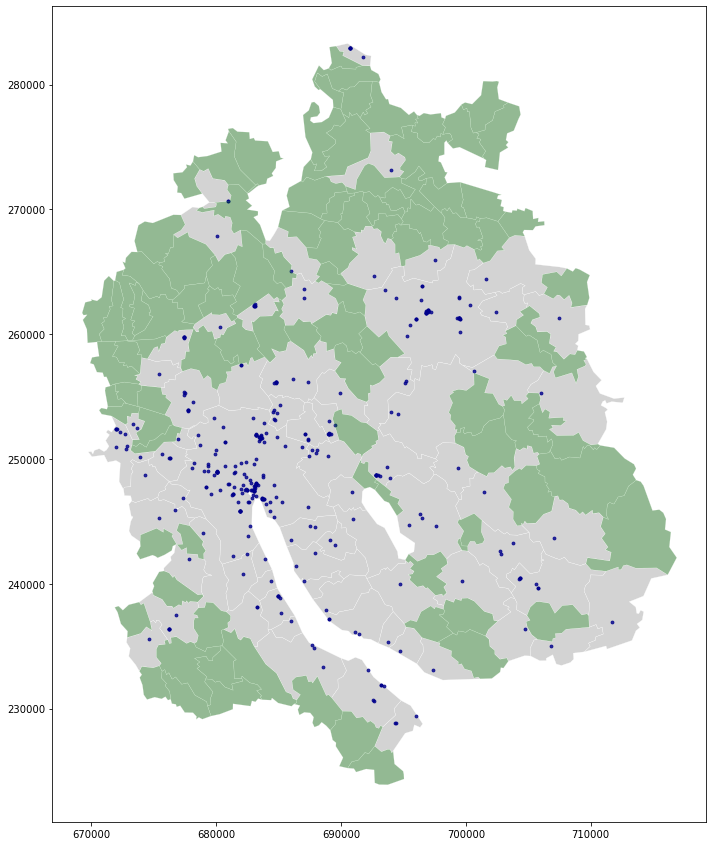

In [35]:
ax = gdf_zh.plot(figsize=(15,15), color='lightgrey', linewidth=0.25, edgecolor='white')
gdf_stores_zh.plot(ax=ax, color='darkblue', markersize=8, alpha = 0.8)
gdf_zh_nostores.plot(ax=ax, color='green', linewidth=0.25, edgecolor='white', alpha=0.3)

### Filter 2

Analoges Vorgehen zu Filter 1. Aber mit einer anderen Abgrenzung: Welche Gemeinden sind mindestens 2km von einer Coop-Filiale entfernt?

Shape:

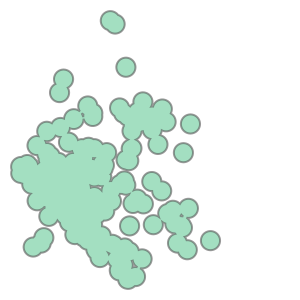

In [36]:
gdf_stores_zh.buffer(2000).unary_union

Filter:

In [37]:
gdf_zh_nostores_2 = gdf_zh[gdf_zh.disjoint(gdf_stores_zh.buffer(2000).unary_union)]

Plot:
- Alle Zürcher Gemeinden
- Alle Coop-Filialen im Kt ZH
- Ein Umkreis von 2km rund um die Coop-Filialen
- in besonderer Farbe: die Gemeinden ohne Coop

Text(0.5, 1.0, 'Gemeinden ohne Coop-Filiale next 2 km')

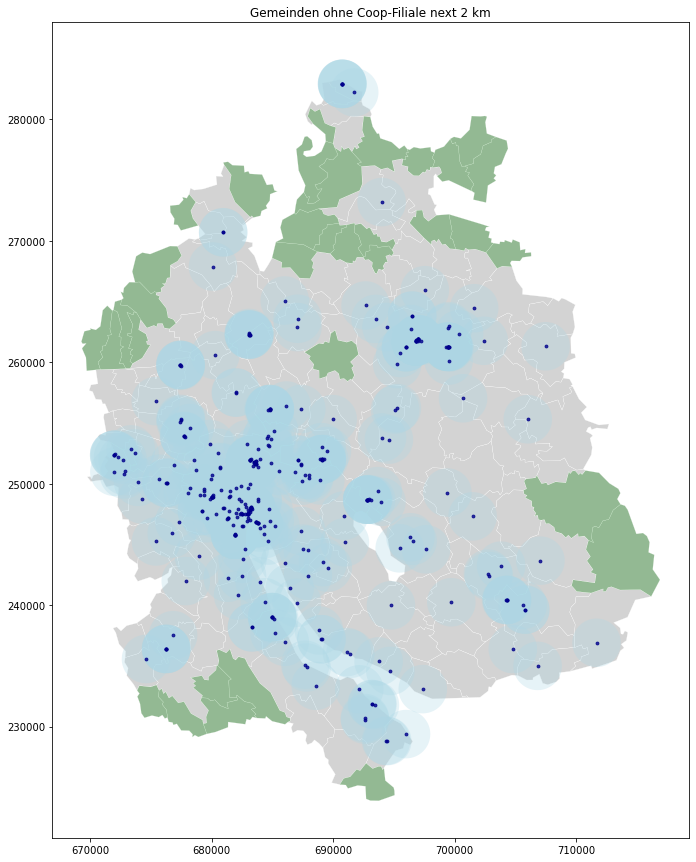

In [38]:
ax = gdf_zh.plot(figsize=(15,15), color='lightgrey', linewidth=0.25, edgecolor='white')
gdf_stores_zh.buffer(2000).plot(ax=ax, color='lightblue', alpha=0.3)
gdf_stores_zh.plot(ax=ax, color='darkblue', markersize=8, alpha = 0.8)
gdf_zh_nostores_2.plot(ax=ax, color='green', linewidth=0.25, edgecolor='white', alpha=0.3)
ax.set_title('Gemeinden ohne Coop-Filiale next 2 km')

## Analyse 3 - Bonus

Gibt es Coop-Geschäfte in denkmalgeschützten Häusern? Überlegen Sie sich ein mögliches Vorgehen, um dies anhand der vorhandenen Datenquellen zu überprüfen. Zum Beispiel: Gibt es Punkte aus dem Coop-GDF und dem Denkmalschutz-GDF, die weniger als 10 Meter auseinander liegen?

(Achtung, je nach dem, wie man vorgeht, brauchen die Checks jeweils ein paar Minuten Rechenzeit!)

In [39]:
ds_gebäude = gdf_ds.buffer(10).unary_union

In [40]:
gdf_stores_dm = gdf_stores_zh[gdf_stores_zh.within(ds_gebäude)]

In [41]:
gdf_ds[gdf_ds['STRASSE'] == 'Hofwiesenstrasse 369']

,GEMEINDE,ORT,PLZ,STRASSE,ENSEMBLE,OBJEKT,GVZ_NR,BAUJAHR,EINSTUFUNG,FESTSETZUN,ERLASS,SCHUTZ,GRUNDBUCHE,OST,NORD,geometry
5115,Zürich,Zürich,8050,Hofwiesenstrasse 369,Zürich: Bahnhof SBB Station Zürich Oerlikon,Aufnahmegebäude,27200068,1913,kantonal,None,None,-,None,2.683437e+06,1.251772e+06,POINT (683436.923 251771.847)


In [42]:
gdf_ds[gdf_ds['STRASSE'] == 'Stadelhoferstrasse 8']

,GEMEINDE,ORT,PLZ,STRASSE,ENSEMBLE,OBJEKT,GVZ_NR,BAUJAHR,EINSTUFUNG,FESTSETZUN,ERLASS,SCHUTZ,GRUNDBUCHE,OST,NORD,geometry
4294,Zürich,Zürich,8001,Stadelhoferstrasse 8,Zürich: Bahnhofanlage SBB Station Zürich Stade...,Aufnahmegebäude,28101031,1892~1894,kantonal,None,None,-,None,2.683823e+06,1.246780e+06,POINT (683822.901 246779.835)


In [43]:
#Es zeigt sich, dass die Bahnhofsgebäude in Zürich und Winterthur,
#in denen auch ein Coop untergebracht ist, denkmalgeschützt sind.